# Supermarket Milestone1
Muhammad Ikhsan Rahman Hakim - FTDS001

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Data Loading

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Data cleaning

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.drop(['invoice id', 'time', 'rating'], axis=1, inplace=True)

In [6]:
df['date']= pd.to_datetime(df['date'])

In [17]:
df.rename(columns={'customer type' : 'customer_type', 
                   'product line' : 'product_line'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   branch                   1000 non-null   object        
 1   city                     1000 non-null   object        
 2   customer_type            1000 non-null   object        
 3   gender                   1000 non-null   object        
 4   product line             1000 non-null   object        
 5   unit price               1000 non-null   float64       
 6   quantity                 1000 non-null   int64         
 7   tax 5%                   1000 non-null   float64       
 8   total                    1000 non-null   float64       
 9   date                     1000 non-null   datetime64[ns]
 10  payment                  1000 non-null   object        
 11  cogs                     1000 non-null   float64       
 12  gross margin percentage  1000 non-n

---------------

### Grouping for chart

In [13]:
d1 = df.groupby(["city"]).sum()
d1

,unit price,quantity,tax 5%,total,cogs,gross margin percentage,gross income
city,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605


In [15]:
d2 = df.groupby(["customer_type"]).sum().reset_index()
d2

,customer_type,unit price,quantity,tax 5%,total,cogs,gross margin percentage,gross income
0,Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164
1,Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205


In [25]:
d3 = df.groupby(['product_line', 'gender'])['total'].sum().reset_index()
d3

,product_line,gender,total
0,Electronic accessories,Female,27102.0225
1,Electronic accessories,Male,27235.5090
2,Fashion accessories,Female,30437.4000
3,Fashion accessories,Male,23868.4950
4,Food and beverages,Female,33170.9175
5,Food and beverages,Male,22973.9265
6,Health and beauty,Female,18560.9865
7,Health and beauty,Male,30632.7525
8,Home and lifestyle,Female,30036.8775
9,Home and lifestyle,Male,23825.0355


In [29]:
d1 = df.groupby(['gender', 'city'])['total'].sum().reset_index()
d1.sort_values(['city'])

,gender,city,total
0,Female,Mandalay,52928.2950
3,Male,Mandalay,53269.3770
1,Female,Naypyitaw,61685.4630
4,Male,Naypyitaw,48883.2435
2,Female,Yangon,53269.1670
5,Male,Yangon,52931.2035


In [46]:
d1 = df.groupby(['gender', 'payment','city'])['total'].sum().reset_index()
d1[d1['city']=='Yangon']


,gender,payment,city,total
2,Female,Cash,Yangon,19050.6750
5,Female,Credit card,Yangon,15084.7725
8,Female,Ewallet,Yangon,19133.7195
11,Male,Cash,Yangon,14730.5760
14,Male,Credit card,Yangon,18009.9780
17,Male,Ewallet,Yangon,20190.6495


--------

# Data exploration

## Central tendency

In [13]:
print("Mean: ",df['total'].mean())
print("Median: ",df['total'].median())
print("Modus: ",df['total'].mode()[0])
print("Std: ",df['total'].std())

Mean:  322.96674900000005
Median:  253.848
Modus:  87.234
Std:  245.88533510097207


## Measure of variance

In [16]:
q1,q2,q3 = np.percentile(df['total'],[25,50,75])

print("Nilai min : ",df['total'].min())
print("Nilai Q1(25%) : ",q1)
print("Nilai Q2(50%) : ",q2)
print("Nilai Q3(75%) : ",q3)
#print("Batas outlier: ",q3+1.5*(q3-q1))
print("Nilai max : ",df['total'].max())

Nilai min :  10.6785
Nilai Q1(25%) :  124.422375
Nilai Q2(50%) :  253.848
Nilai Q3(75%) :  471.35024999999996
Nilai max :  1042.65


## Distribution Density

<AxesSubplot:ylabel='Frequency'>

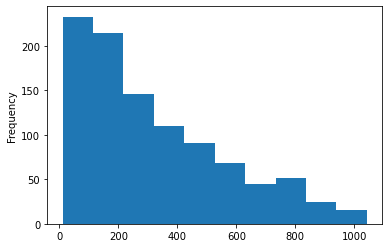

In [17]:
df['total'].plot.hist(bins=10)

In [20]:
tot_s = df['total'].skew()
tot_k = df['total'].kurt()
print('Total skewness:', tot_s)
print('Total kurtosis:', tot_k)

Total skewness: 0.8925698049581418
Total kurtosis: -0.08188475790435135


A distribution with a negative kurtosis value indicates that the distribution has lighter tails (or lack of outliers) than the normal distribution. (source:https://www.researchgate.net/post/What-is-the-meaning-of-negative-coefficient-of-kurtosis-obtained-in-my-specific-AFM-sample)

In [21]:
df['total'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: total, dtype: float64

# Hypothesis Testing

## Confidence interval

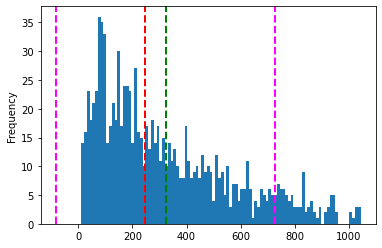

Mean: 322.96674900000005
StdErr: 245.88533510097207
90% Confidence Interval: (-81.47863625501213, 727.4121342550121)


In [39]:
ci = stats.norm.interval(0.90, df['total'].mean(), df['total'].std())


df['total'].plot.hist(bins=100) 
plt.axvline(df['total'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['total'].std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

print ('Mean: ' + str(df['total'].mean()))
print ('StdErr: ' + str(df['total'].std()))
print ('90% Confidence Interval: ' + str(ci))

In [33]:
df_member = df[df['customer_type']=='Member']
df_normal = df[(df['customer_type']=='Normal')]

mean_mem = df_member['total'].mean()
std_mem = df_member['total'].std()
mean_norm = df_normal['total'].mean()
std_norm = df_normal['total'].std()

print('Member cust mean: ',mean_mem)
print('Member cust std: ',std_mem)
print('Normal cust mean: ',mean_norm)
print('Normal cust std: ',std_norm)

Member cust mean:  327.7913053892216
Member cust std:  247.99378178667004
Normal cust mean:  318.122855711423
Normal cust std:  243.9028004475982


Disini akan diuji apakah H0 benar terbukti atau hanya kebetulan semata dikarenakan *random chance* (dengan critical value 0,05)
- H0: member cust mean = normal cust mean 
- H1: member cust mean != normal cust mean 

Member sample mean:334.51418704482865
Normal sample mean:313.3580774532209
t-statistic:0.5744758532006674
p-value:0.566297939101803


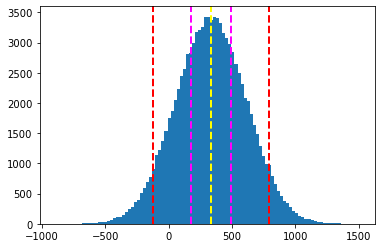

In [50]:
np.random.seed(123)
member = np.random.normal(mean_mem, std_mem, 100)
normal = np.random.normal(mean_norm, std_norm, 100)
print("Member sample mean:" + str(member.mean()))
print("Normal sample mean:" + str(normal.mean()))

# T-Test
t,p = stats.ttest_ind(member, normal)

print("t-statistic:" + str(t))
print("p-value:" + str(p))

pop = np.random.normal(member.mean(), member.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, member.mean(), member.std())
plt.hist(pop, bins=100)

# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)

# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() - t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hasil yang didapat adalah P-value lebih besar dari critical value(0,05). Maka dapat disimpulkan bahwa H0 gagal di*reject* dikarenakan kekurangan bukti untuk menolaknya.

# Kesimpulan
Customer yang telah menjadi member belum tentu memiliki rata-rata total pembelian yang sama dengan customer normal (non-member), butuh bukti-bukti tambahan untuk mendukung pernyataan ini.